In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping
# import tensorflow as tf

import seaborn as sns

In [3]:
# import tensorflow as tf
# tf.config.list_physical_devices()

In [15]:
def display_mode_trainTestGraphs(results):
    train_loss = results.history['loss']
    train_acc = results.history['accuracy']
    val_loss = results.history['val_loss']
    val_acc = results.history['val_accuracy']


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label='train_loss')
    sns.lineplot(x=results.epoch, y=train_acc, ax=ax2, label='train_accuracy')

    sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label='val_loss')
    sns.lineplot(x=results.epoch, y=val_acc, ax=ax2, label='val_accuracy')
    ax1.set_title('Loss')
    ax2.set_title('Accuracy')
    ax1.legend();

# Training Set

In [4]:
# Normalizing data for 8 bit
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'images/train/',
    target_size = (227,227),
    batch_size=128,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 48979 images belonging to 8 classes.


# Validation Set

In [5]:
# Normalizing data for 8 bit
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    'images/val/',
    target_size = (227,227),
    batch_size=128,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 14175 images belonging to 8 classes.


# Test Set

In [6]:
# Normalizing data for 8 bit
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'images/test/',
    target_size = (227,227),
    batch_size=128,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 1793 images belonging to 8 classes.


# Modeling

In [51]:
early_stop = EarlyStopping(monitor='val_loss', 
                           min_delta=1e-8,
                           verbose=1,
                           patience = 5,
                           mode='min')

## Model 1

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(filters=16,
                       kernel_size=(3,3),
                       activation='relu',
                       input_shape=(227,227,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 225, 225, 16)      160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 64)      

In [13]:
results = model.fit(train_generator,
                    steps_per_epoch=50,  # Number of training samples to pull per epoch
                    epochs=50,  # Number of epochs
                    validation_data=val_generator,
                    validation_steps=50,  # Number of validation samples to run validation on
                    verbose=1
                    )

Epoch 1/50
50/50 [==============================] - 8s 148ms/step - loss: 0.8560 - accuracy: 0.7994 - val_loss: 0.8312 - val_accuracy: 0.7920
Epoch 2/50
50/50 [==============================] - 7s 147ms/step - loss: 0.7373 - accuracy: 0.8153 - val_loss: 0.8959 - val_accuracy: 0.7823
Epoch 3/50
50/50 [==============================] - 7s 147ms/step - loss: 0.6763 - accuracy: 0.8195 - val_loss: 0.8843 - val_accuracy: 0.7808
Epoch 4/50
50/50 [==============================] - 7s 147ms/step - loss: 0.6085 - accuracy: 0.8355 - val_loss: 0.8126 - val_accuracy: 0.7934
Epoch 5/50
50/50 [==============================] - 7s 147ms/step - loss: 0.5856 - accuracy: 0.8322 - val_loss: 0.7894 - val_accuracy: 0.7897
Epoch 6/50
50/50 [==============================] - 7s 145ms/step - loss: 0.5320 - accuracy: 0.8487 - val_loss: 0.7275 - val_accuracy: 0.7908
Epoch 7/50
50/50 [==============================] - 7s 146ms/step - loss: 0.5712 - accuracy: 0.8384 - val_loss: 0.7244 - val_accuracy: 0.7964
Epoch 

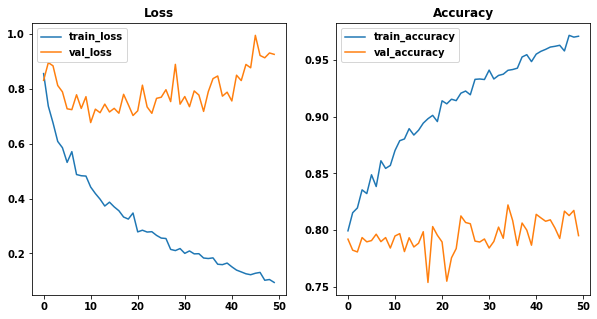

In [16]:
display_mode_trainTestGraphs(results)

## Model 2

Increasing steps in epoch

In [21]:
model = models.Sequential()

model.add(layers.Conv2D(filters=16,
                       kernel_size=(3,3),
                       activation='relu',
                       input_shape=(227,227,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 225, 225, 16)      160       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 64)      

In [22]:
results = model.fit(train_generator,
                    steps_per_epoch=150,  # Number of training samples to pull per epoch
                    epochs=50,  # Number of epochs
                    validation_data=val_generator,
                    validation_steps=100,  # Number of validation samples to run validation on
                    verbose=1
                    )

Epoch 1/50
150/150 [==============================] - 19s 125ms/step - loss: 0.7516 - accuracy: 0.8124 - val_loss: 0.8139 - val_accuracy: 0.7907
Epoch 2/50
150/150 [==============================] - 19s 123ms/step - loss: 0.6123 - accuracy: 0.8271 - val_loss: 0.7553 - val_accuracy: 0.7944
Epoch 3/50
150/150 [==============================] - 19s 124ms/step - loss: 0.5059 - accuracy: 0.8521 - val_loss: 0.7357 - val_accuracy: 0.7974
Epoch 4/50
150/150 [==============================] - 19s 125ms/step - loss: 0.4544 - accuracy: 0.8661 - val_loss: 0.7237 - val_accuracy: 0.7930
Epoch 5/50
150/150 [==============================] - 19s 124ms/step - loss: 0.3908 - accuracy: 0.8834 - val_loss: 0.7014 - val_accuracy: 0.8094
Epoch 6/50
150/150 [==============================] - 19s 124ms/step - loss: 0.3593 - accuracy: 0.8910 - val_loss: 0.6860 - val_accuracy: 0.7900
Epoch 7/50
150/150 [==============================] - 19s 124ms/step - loss: 0.3152 - accuracy: 0.9016 - val_loss: 0.7463 - val_ac

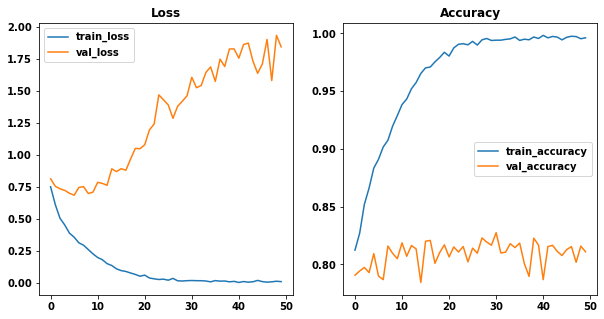

In [23]:
display_mode_trainTestGraphs(results)

## Model: VGG16

## Model 3: DNN

In [26]:
model = models.Sequential()

model.add(layers.Conv2D(filters=16,
                       kernel_size=(3,3),
                       activation='relu',
                       input_shape=(227,227,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 225, 225, 16)      160       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 26, 26, 64)      

In [27]:
results = model.fit(train_generator,
                    steps_per_epoch=100,  # Number of training samples to pull per epoch
                    epochs=50,  # Number of epochs
                    validation_data=val_generator,
                    validation_steps=50,  # Number of validation samples to run validation on
                    verbose=1
                    )

Epoch 1/50
100/100 [==============================] - 14s 131ms/step - loss: 0.7809 - accuracy: 0.8171 - val_loss: 0.8092 - val_accuracy: 0.7819
Epoch 2/50
100/100 [==============================] - 13s 125ms/step - loss: 0.6329 - accuracy: 0.8313 - val_loss: 0.7968 - val_accuracy: 0.7622
Epoch 3/50
100/100 [==============================] - 12s 119ms/step - loss: 0.5481 - accuracy: 0.8477 - val_loss: 0.7678 - val_accuracy: 0.7906
Epoch 4/50
100/100 [==============================] - 12s 117ms/step - loss: 0.4817 - accuracy: 0.8640 - val_loss: 0.6730 - val_accuracy: 0.8116
Epoch 5/50
100/100 [==============================] - 12s 118ms/step - loss: 0.4519 - accuracy: 0.8705 - val_loss: 0.6734 - val_accuracy: 0.7997
Epoch 6/50
100/100 [==============================] - 11s 114ms/step - loss: 0.3944 - accuracy: 0.8843 - val_loss: 0.6176 - val_accuracy: 0.8050
Epoch 7/50
100/100 [==============================] - 11s 114ms/step - loss: 0.3609 - accuracy: 0.8886 - val_loss: 0.6534 - val_ac

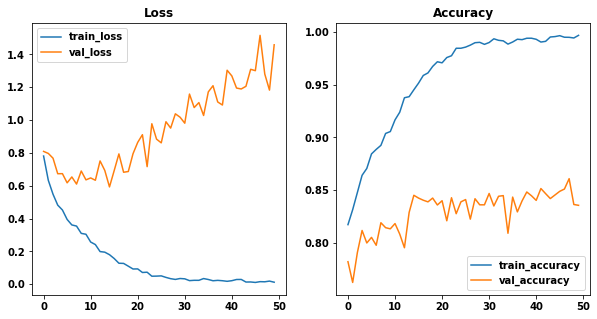

In [28]:
display_mode_trainTestGraphs(results)

## Adding a dropout layer and furthering depth

In [31]:
model = models.Sequential()

model.add(layers.Conv2D(filters=16,
                       kernel_size=(3,3),
                       activation='relu',
                       input_shape=(227,227,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 225, 225, 16)      160       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 53, 53, 64)        18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 51, 51, 64)      

In [32]:
results = model.fit(train_generator,
                    steps_per_epoch=100,  # Number of training samples to pull per epoch
                    epochs=50,  # Number of epochs
                    validation_data=val_generator,
                    validation_steps=50,  # Number of validation samples to run validation on
                    verbose=1
                    )

Epoch 1/50
100/100 [==============================] - 13s 120ms/step - loss: 0.8576 - accuracy: 0.8089 - val_loss: 0.8592 - val_accuracy: 0.7892
Epoch 2/50
100/100 [==============================] - 12s 116ms/step - loss: 0.7553 - accuracy: 0.8230 - val_loss: 0.8286 - val_accuracy: 0.7959
Epoch 3/50
100/100 [==============================] - 12s 117ms/step - loss: 0.7258 - accuracy: 0.8194 - val_loss: 0.9099 - val_accuracy: 0.7584
Epoch 4/50
100/100 [==============================] - 12s 117ms/step - loss: 0.6606 - accuracy: 0.8262 - val_loss: 0.8371 - val_accuracy: 0.7783
Epoch 5/50
100/100 [==============================] - 12s 117ms/step - loss: 0.5590 - accuracy: 0.8500 - val_loss: 0.6942 - val_accuracy: 0.8072
Epoch 6/50
100/100 [==============================] - 12s 117ms/step - loss: 0.4899 - accuracy: 0.8634 - val_loss: 0.7023 - val_accuracy: 0.7934
Epoch 7/50
100/100 [==============================] - 12s 117ms/step - loss: 0.4421 - accuracy: 0.8721 - val_loss: 0.6540 - val_ac

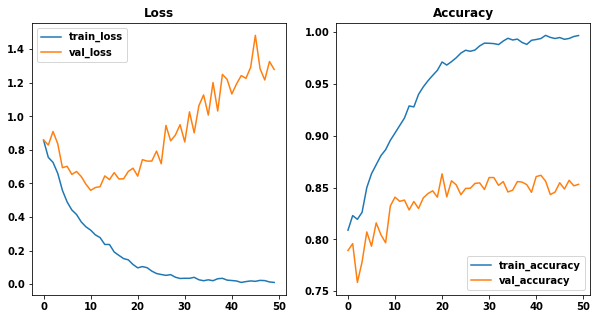

In [33]:
display_mode_trainTestGraphs(results)

In [37]:
## Increasing dropout rate
model = models.Sequential()

model.add(layers.Conv2D(filters=16,
                       kernel_size=(3,3),
                       activation='relu',
                       input_shape=(227,227,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 225, 225, 16)      160       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 53, 53, 64)        18496     
                                                                 
 conv2d_51 (Conv2D)          (None, 51, 51, 64)      

In [39]:
results = model.fit(train_generator,
                    steps_per_epoch=100,  # Number of training samples to pull per epoch
                    epochs=50,  # Number of epochs
                    validation_data=val_generator,
                    validation_steps=50,  # Number of validation samples to run validation on
                    verbose=1,
                    callbacks = [early_stop]
                    )

Epoch 1/50
100/100 [==============================] - 12s 119ms/step - loss: 0.8514 - accuracy: 0.8141 - val_loss: 0.8730 - val_accuracy: 0.7931
Epoch 2/50
100/100 [==============================] - 12s 117ms/step - loss: 0.7953 - accuracy: 0.8160 - val_loss: 0.8651 - val_accuracy: 0.7930
Epoch 3/50
100/100 [==============================] - 12s 117ms/step - loss: 0.7069 - accuracy: 0.8205 - val_loss: 0.7864 - val_accuracy: 0.7972
Epoch 4/50
100/100 [==============================] - 12s 117ms/step - loss: 0.5974 - accuracy: 0.8410 - val_loss: 0.7638 - val_accuracy: 0.7958
Epoch 5/50
100/100 [==============================] - 12s 118ms/step - loss: 0.5416 - accuracy: 0.8539 - val_loss: 0.6774 - val_accuracy: 0.8097
Epoch 6/50
100/100 [==============================] - 12s 117ms/step - loss: 0.4687 - accuracy: 0.8716 - val_loss: 0.6686 - val_accuracy: 0.8083
Epoch 7/50
100/100 [==============================] - 12s 117ms/step - loss: 0.4420 - accuracy: 0.8727 - val_loss: 0.6529 - val_ac

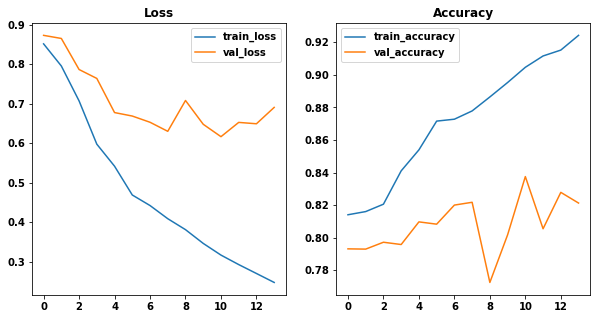

In [40]:
display_mode_trainTestGraphs(results)

## Even deeeeeper NN

In [45]:
model = models.Sequential()

model.add(layers.Conv2D(filters=16,
                       kernel_size=(3,3),
                       activation='relu',
                       input_shape=(227,227,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 225, 225, 16)      160       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 110, 110, 64)      9280      
                                                                 
 conv2d_78 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 52, 52, 128)     

In [46]:
results = model.fit(train_generator,
                    steps_per_epoch=100,  # Number of training samples to pull per epoch
                    epochs=50,  # Number of epochs
                    validation_data=val_generator,
                    validation_steps=50,  # Number of validation samples to run validation on
                    verbose=1,
                    callbacks = [early_stop]
                    )

Epoch 1/50
100/100 [==============================] - 24s 234ms/step - loss: 1.0075 - accuracy: 0.8101 - val_loss: 0.8736 - val_accuracy: 0.7877
Epoch 2/50
100/100 [==============================] - 23s 233ms/step - loss: 0.7871 - accuracy: 0.8184 - val_loss: 0.8622 - val_accuracy: 0.7911
Epoch 3/50
100/100 [==============================] - 23s 233ms/step - loss: 0.8084 - accuracy: 0.8124 - val_loss: 0.9027 - val_accuracy: 0.7916
Epoch 4/50
100/100 [==============================] - 23s 234ms/step - loss: 0.7938 - accuracy: 0.8183 - val_loss: 0.8755 - val_accuracy: 0.7928
Epoch 5/50
100/100 [==============================] - 23s 234ms/step - loss: 0.7803 - accuracy: 0.8184 - val_loss: 0.8616 - val_accuracy: 0.7919
Epoch 6/50
100/100 [==============================] - 23s 234ms/step - loss: 0.7929 - accuracy: 0.8168 - val_loss: 0.8869 - val_accuracy: 0.7837
Epoch 7/50
100/100 [==============================] - 23s 234ms/step - loss: 0.7876 - accuracy: 0.8159 - val_loss: 0.8632 - val_ac

In [47]:
# with dropout
model = models.Sequential()

model.add(layers.Conv2D(filters=16,
                       kernel_size=(3,3),
                       activation='relu',
                       input_shape=(227,227,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 225, 225, 16)      160       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 110, 110, 64)      9280      
                                                                 
 conv2d_86 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 52, 52, 128)     

In [48]:
results = model.fit(train_generator,
                    steps_per_epoch=100,  # Number of training samples to pull per epoch
                    epochs=50,  # Number of epochs
                    validation_data=val_generator,
                    validation_steps=50,  # Number of validation samples to run validation on
                    verbose=1,
                    callbacks = [early_stop]
                    )

Epoch 1/50
100/100 [==============================] - 24s 232ms/step - loss: 0.9157 - accuracy: 0.8070 - val_loss: 0.8919 - val_accuracy: 0.7819
Epoch 2/50
100/100 [==============================] - 23s 233ms/step - loss: 0.7764 - accuracy: 0.8233 - val_loss: 0.8710 - val_accuracy: 0.7919
Epoch 3/50
100/100 [==============================] - 23s 232ms/step - loss: 0.7820 - accuracy: 0.8207 - val_loss: 0.8650 - val_accuracy: 0.7906
Epoch 4/50
100/100 [==============================] - 23s 233ms/step - loss: 0.7807 - accuracy: 0.8186 - val_loss: 0.8698 - val_accuracy: 0.7967
Epoch 5/50
100/100 [==============================] - 23s 233ms/step - loss: 0.8016 - accuracy: 0.8172 - val_loss: 0.8499 - val_accuracy: 0.7927
Epoch 6/50
100/100 [==============================] - 23s 234ms/step - loss: 0.7908 - accuracy: 0.8184 - val_loss: 0.8602 - val_accuracy: 0.7906
Epoch 7/50
100/100 [==============================] - 24s 236ms/step - loss: 0.7888 - accuracy: 0.8174 - val_loss: 0.8678 - val_ac

In [52]:
# with dropout
model = models.Sequential()

model.add(layers.Conv2D(filters=16,
                       kernel_size=(3,3),
                       activation='relu',
                       input_shape=(227,227,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 225, 225, 16)      160       
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 110, 110, 64)      9280      
                                                                 
 conv2d_102 (Conv2D)         (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 52, 52, 128)     

In [53]:
results = model.fit(train_generator,
                    steps_per_epoch=100,  # Number of training samples to pull per epoch
                    epochs=50,  # Number of epochs
                    validation_data=val_generator,
                    validation_steps=50,  # Number of validation samples to run validation on
                    verbose=1,
                    callbacks = [early_stop]
                    )

Epoch 1/50
100/100 [==============================] - 24s 233ms/step - loss: 1.0136 - accuracy: 0.7926 - val_loss: 0.8776 - val_accuracy: 0.7997
Epoch 2/50
100/100 [==============================] - 23s 232ms/step - loss: 0.8082 - accuracy: 0.8135 - val_loss: 0.8774 - val_accuracy: 0.7877
Epoch 3/50
100/100 [==============================] - 23s 233ms/step - loss: 0.7991 - accuracy: 0.8134 - val_loss: 0.8449 - val_accuracy: 0.7997
Epoch 4/50
100/100 [==============================] - 23s 233ms/step - loss: 0.8080 - accuracy: 0.8127 - val_loss: 0.8706 - val_accuracy: 0.7895
Epoch 5/50
100/100 [==============================] - 23s 235ms/step - loss: 0.8027 - accuracy: 0.8126 - val_loss: 0.8781 - val_accuracy: 0.7930
Epoch 6/50
100/100 [==============================] - 23s 234ms/step - loss: 0.7981 - accuracy: 0.8166 - val_loss: 0.8568 - val_accuracy: 0.7920
Epoch 7/50
100/100 [==============================] - 23s 234ms/step - loss: 0.8056 - accuracy: 0.8130 - val_loss: 0.8498 - val_ac

# Reducing multiple conv layers

In [58]:
# with dropout
model = models.Sequential()

model.add(layers.Conv2D(filters=16,
                       kernel_size=(3,3),
                       activation='relu',
                       input_shape=(227,227,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(512, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_113 (Conv2D)         (None, 225, 225, 16)      160       
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_114 (Conv2D)         (None, 110, 110, 64)      9280      
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_115 (Conv2D)         (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 26, 26, 128)    

In [59]:
results = model.fit(train_generator,
                    steps_per_epoch=100,  # Number of training samples to pull per epoch
                    epochs=50,  # Number of epochs
                    validation_data=val_generator,
                    validation_steps=100,  # Number of validation samples to run validation on
                    verbose=1,
                    callbacks = [early_stop]
                    )

Epoch 1/50
100/100 [==============================] - 18s 178ms/step - loss: 0.8968 - accuracy: 0.8120 - val_loss: 0.8706 - val_accuracy: 0.7904
Epoch 2/50
100/100 [==============================] - 18s 177ms/step - loss: 0.7775 - accuracy: 0.8183 - val_loss: 0.8791 - val_accuracy: 0.7933
Epoch 3/50
100/100 [==============================] - 18s 178ms/step - loss: 0.6364 - accuracy: 0.8333 - val_loss: 0.7731 - val_accuracy: 0.7868
Epoch 4/50
100/100 [==============================] - 18s 177ms/step - loss: 0.5426 - accuracy: 0.8527 - val_loss: 0.7126 - val_accuracy: 0.8159
Epoch 5/50
100/100 [==============================] - 18s 177ms/step - loss: 0.4803 - accuracy: 0.8654 - val_loss: 0.6816 - val_accuracy: 0.8062
Epoch 6/50
100/100 [==============================] - 18s 177ms/step - loss: 0.4327 - accuracy: 0.8734 - val_loss: 0.6432 - val_accuracy: 0.8099
Epoch 7/50
100/100 [==============================] - 18s 178ms/step - loss: 0.3803 - accuracy: 0.8841 - val_loss: 0.6365 - val_ac

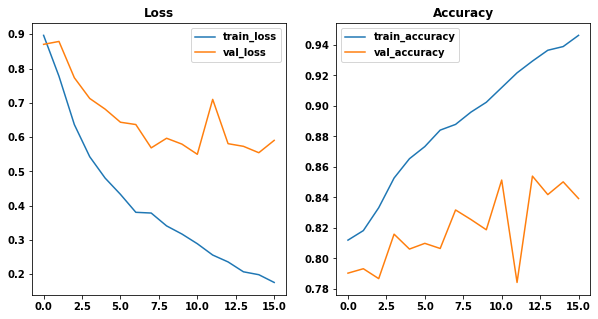

In [60]:
display_mode_trainTestGraphs(results)

In [61]:
# reducing learning rate
model = models.Sequential()

model.add(layers.Conv2D(filters=16,
                       kernel_size=(3,3),
                       activation='relu',
                       input_shape=(227,227,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.Conv2D(512, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.Conv2D(512, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])



results = model.fit(train_generator,
                    steps_per_epoch=100,  # Number of training samples to pull per epoch
                    epochs=50,  # Number of epochs
                    validation_data=val_generator,
                    validation_steps=100,  # Number of validation samples to run validation on
                    verbose=1,
                    callbacks = [early_stop]
                    )

Epoch 1/50
100/100 [==============================] - 19s 183ms/step - loss: 0.9192 - accuracy: 0.8066 - val_loss: 0.8576 - val_accuracy: 0.7916
Epoch 2/50
100/100 [==============================] - 18s 182ms/step - loss: 0.7526 - accuracy: 0.8183 - val_loss: 0.8239 - val_accuracy: 0.7902
Epoch 3/50
100/100 [==============================] - 18s 181ms/step - loss: 0.6494 - accuracy: 0.8278 - val_loss: 0.8180 - val_accuracy: 0.7895
Epoch 4/50
100/100 [==============================] - 18s 179ms/step - loss: 0.6016 - accuracy: 0.8346 - val_loss: 0.8047 - val_accuracy: 0.7556
Epoch 5/50
100/100 [==============================] - 18s 177ms/step - loss: 0.5397 - accuracy: 0.8481 - val_loss: 0.7399 - val_accuracy: 0.7761
Epoch 6/50
100/100 [==============================] - 18s 178ms/step - loss: 0.5160 - accuracy: 0.8526 - val_loss: 0.7078 - val_accuracy: 0.7935
Epoch 7/50
100/100 [==============================] - 18s 178ms/step - loss: 0.4809 - accuracy: 0.8608 - val_loss: 0.7212 - val_ac

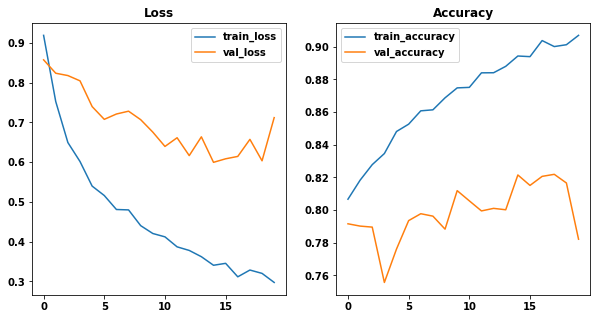

In [62]:
display_mode_trainTestGraphs(results)